#  1.Choose a classification dataset and normalize features.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Iris.csv")

# Drop Id column if present
if "Id" in df.columns:
    df = df.drop("Id", axis=1)

# Features and target
X = df.drop("Species", axis=1)
y = df["Species"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows of normalized features:")
print(X_scaled[:5])


First 5 rows of normalized features:
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


#  2.Use KNeighborsClassifier from sklearn.

In [2]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model with k=3 (example)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_scaled, y)

# Make predictions
y_pred = knn.predict(X_scaled[:5])
print("Sample Predictions:", y_pred)


Sample Predictions: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


#  3.Experiment with different values of K.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Try different K values
k_values = [1, 3, 5, 7, 9, 11]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} → Accuracy: {acc:.3f}")


K = 1 → Accuracy: 0.967
K = 3 → Accuracy: 0.933
K = 5 → Accuracy: 0.933
K = 7 → Accuracy: 0.967
K = 9 → Accuracy: 0.967
K = 11 → Accuracy: 0.967


# 4.Evaluate model using accuracy, confusion matrix.

Accuracy: 0.933


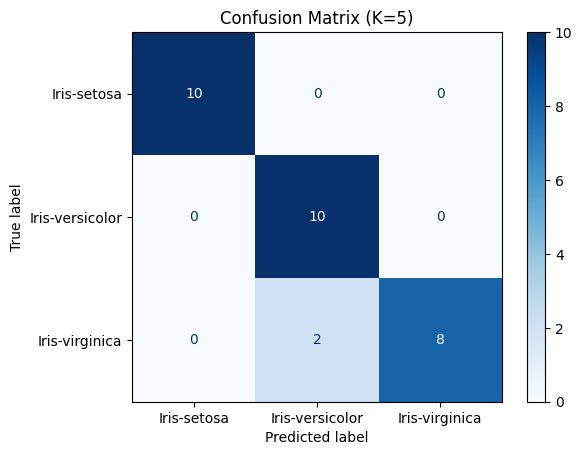

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# Use best K (example: k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (K=5)")
plt.show()


# 5.Visualize decision boundaries.

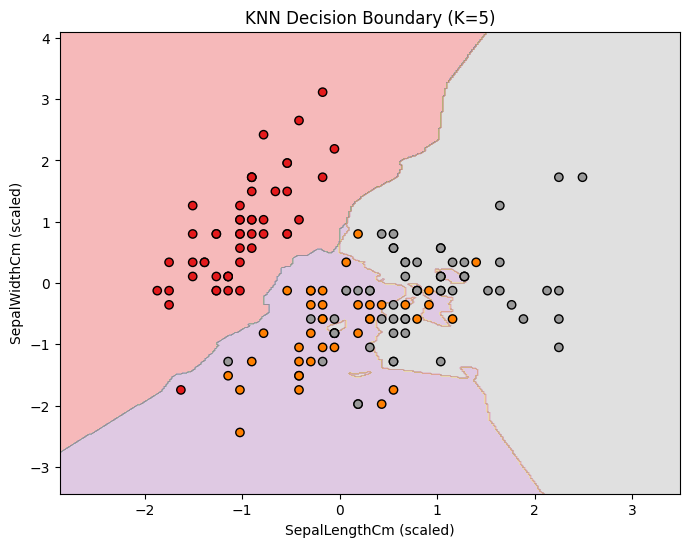

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Encode target to integers (for plotting)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Use only first two features (for 2D plotting)
X_plot = X_scaled[:, :2]
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(
    X_plot, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train KNN (example k=5)
knn_plot = KNeighborsClassifier(n_neighbors=5)
knn_plot.fit(X_train_plot, y_train_plot)

# Create meshgrid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on meshgrid
Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_encoded, edgecolor="k", cmap=plt.cm.Set1)
plt.title("KNN Decision Boundary (K=5)")
plt.xlabel("SepalLengthCm (scaled)")
plt.ylabel("SepalWidthCm (scaled)")
plt.show()
